# Open Ocean
# Open Earth Fundation
---------------------------------------------------------------------------------------------------------------------
Authors: Margaux Filippi & Maureen Fonseca

---------------------------------------------------------------------------------------------------------------------

<h1> Step 2: calculate different metrics for each modulating factor </h1>

This notebook is the second part of the `Step1_Curate_IUCN_RedList.ipynb`

<h2> Modulating Factor 2: Species Richness </h2>

<h2> Data needed for this project </h2>

The data was output by `Step1_Curate_IUCN_RedList.ipynb` and can be found under [IUCN_RedList](https://drive.google.com/drive/folders/1nkw8VK9mPdthjyDOSsnljqCo_b7lMdP4?usp=sharing) under a temporary folder that accompagnies the GitHub repository: 

`Ocean Program > data > data_processed > gdf_ACMC_IUCN_range_status_filtered`

### Analyzing UICN data for marine species in the Eastern Tropical Pacific.

In [1]:
import geopandas as gpd

/Users/maureenfonseca/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
import glob

In [4]:
from shapely.geometry import Polygon, Point

In [5]:
import fiona; #help(fiona.open)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import timeit

In [129]:
from netCDF4 import Dataset
import cmocean
import geopandas as gpd
from matplotlib.ticker import LinearLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

OEF functions

In [8]:
from marinebiodiversity_utils import *

<h1> 2.1. Load data </h1>

<h2> 2.1.1 Get the conservation area</h2>

Mostly for plotting.

<h3> Coordinates for Cocos Island </h3>

Cocos Island is located at 05°31′41″N; 87°03′40″W

In [9]:
Cocos_lat = 5+31/60+41/3600
Cocos_lon = -(87+3/60+40/3600)
Cocos = Point(Cocos_lon, Cocos_lat)

<h3> Import entire AMMB and PNIC </h3>

In [10]:
ACMC = gpd.read_file('../../Geospatial_ACMC/ACMC.shp')
AMMB = gpd.read_file('../../Geospatial_ACMC/AMMB.shp')
PNIC = gpd.read_file('../../Geospatial_ACMC/PNIC.shp')

Inspect the Coordinate Reference Systems (CRS).

In [11]:
AMMB.crs

<Derived Projected CRS: EPSG:5367>
Name: CR05 / CRTM05
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Costa Rica - onshore and offshore east of 86°30'W.
- bounds: (-86.5, 2.21, -81.43, 11.77)
Coordinate Operation:
- name: Costa Rica TM 2005
- method: Transverse Mercator
Datum: Costa Rica 2005
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
PNIC.crs

<Derived Projected CRS: EPSG:5367>
Name: CR05 / CRTM05
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Costa Rica - onshore and offshore east of 86°30'W.
- bounds: (-86.5, 2.21, -81.43, 11.77)
Coordinate Operation:
- name: Costa Rica TM 2005
- method: Transverse Mercator
Datum: Costa Rica 2005
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
AMMB_WGS84 = AMMB.to_crs(crs=4326)
PNIC_WGS84 = PNIC.to_crs(crs=4326)
ACMC = ACMC.set_crs(epsg=4326, allow_override=True)

In [14]:
ACMC['area']

0    1.062837e+07
Name: area, dtype: float64

Get area information.

In [15]:
print("Area, PNIC:")
print("{:0.2f}".format(PNIC_WGS84.area.item()) + " sqdeg.")
print("{:,.2f}".format(PNIC_WGS84.to_crs(crs=31970).area.item()*10**(-6)) + " sqkm in CRS 31970.")

print("\nArea, AMMB:")
print("{:0.2f}".format(AMMB_WGS84.area.item()) + " sqdeg.")
print("{:,.2f}".format(AMMB_WGS84.to_crs(crs=31970).area.item()*10**(-6)) + " sqkm in CRS 31970.")

print("\nTotal Area, ACMC:")
print("{:0.2f}".format(AMMB_WGS84.area.item() + PNIC_WGS84.area.item()) + " sqdeg.")
print("{:,.2f}".format(AMMB_WGS84.to_crs(crs=31970).area.item()*10**(-6) + PNIC_WGS84.to_crs(crs=31970).area.item()*10**(-6)) + " sqkm in CRS 31970.")

Area, PNIC:
4.47 sqdeg.
54,799.50 sqkm in CRS 31970.

Area, AMMB:
8.66 sqdeg.
106,243.90 sqkm in CRS 31970.

Total Area, ACMC:
13.13 sqdeg.
161,043.41 sqkm in CRS 31970.


/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_9053/2915868912.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print("{:0.2f}".format(PNIC_WGS84.area.item()) + " sqdeg.")
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_9053/2915868912.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print("{:0.2f}".format(AMMB_WGS84.area.item()) + " sqdeg.")
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_9053/2915868912.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print("{:0.2f}".format(AMMB_WGS84.area.item() + PNIC_WGS84.area.item()) + " sqdeg.")


<h2> 2.1.2 Get the species data </h2>

This is the outcome from `Step1_Curate_IUCN_RedList.ipynb`.

In [16]:
df = gpd.read_file('../../ACMC_IUCN_data/gdf_ACMC_IUCN_range_status_filtered.shp') 

In [17]:
df.head()

,index,ASSESSMENT,ID_NO,BINOMIAL,PRESENCE,ORIGIN,SEASONAL,COMPILER,YEAR,CITATION,LEGEND,SUBSPECIES,SUBPOP,DIST_COMM,ISLAND,TAX_COMM,redlistCat,scientific,geometry
0,3,1506081,177969.0,Acanthurus nigricans,1,1,1,Jonnell Sanciangco,2010,International Union for Conservation of Nature...,Extant (resident),None,None,None,None,None,Least Concern,Acanthurus nigricans,"MULTIPOLYGON (((109.79501 6.13966, 109.89836 6..."
1,10,1512439,177988.0,Naso annulatus,1,1,1,Jonnell Sanciangco,2010,International Union for Conservation of Nature...,Extant (resident),None,None,None,None,None,Least Concern,Naso annulatus,"MULTIPOLYGON (((109.79501 6.13966, 109.89836 6..."
2,13,1517273,178002.0,Naso hexacanthus,1,1,1,Jonnell Sanciangco,2010,International Union for Conservation of Nature...,Extant (resident),None,None,None,None,None,Least Concern,Naso hexacanthus,"MULTIPOLYGON (((99.07516 7.94581, 99.07794 7.9..."
3,97,2412930,195754.0,Gymnothorax meleagris,1,1,1,IUCN Marine Biodiversity Unit/GMSA,2018,IUCN Marine Biodiversity Unit/GMSA,Extant (resident),None,None,None,None,None,Least Concern,Gymnothorax meleagris,"MULTIPOLYGON (((144.23853 -3.82053, 144.24330 ..."
4,102,2423479,195824.0,Uropterygius macrocephalus,1,1,1,IUCN Marine Biodiversity Unit/GMSA,2018,IUCN Marine Biodiversity Unit/GMSA,Extant (resident),None,None,None,None,None,Least Concern,Uropterygius macrocephalus,"MULTIPOLYGON (((144.23853 -3.82053, 144.24330 ..."


With the first version data from Margaux, the data set had 164 unique species, now:

In [20]:
print("There are " + str(len(df)) + " unique species in this dataset.")

There are 640 unique species in this dataset.


<h1> 2.2. Preliminary calculations </h1> 

In [27]:
area_of_conservation = ACMC.geometry.item()

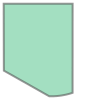

In [28]:
area_of_conservation

Species Richness: use the total number of species within the area of interest to get the base credit.

Info from SINAC, link to [Google Drive](https://drive.google.com/file/d/1Bztf55bKgZi7X9nJPbWGdOUtW7Zv0-3_/view?usp=sharing) document
```
The CINP is home to 1688 species of marine fauna, of which
45 are endemic. This represents 47,4 % of the endemism in
Costa Rica. In other words, the CINP contributes half of the
country’s unique biological richness.
```
SINAC (Sistema Nacional de Áreas de Conservación). 2018. Importancia de los ecosistemas y las poblaciones del sitio de interés: Parque Nacional Isla del Coco (PNIC), Área Marina de Manejo Montes Submarinos (AMM MS) y aguas adyacentes. Área de Conservación Marina Cocos. San José, Costa Rica. 68 p.

Note: this was the old park
```
The CINP, created in 1978, is located 342 miles (500 km) southeast of Costa Rica’s Pacific coast and covers an area of 785 sq miles (2034 km2). The island comprises an area of about 9 sq miles (23 km2) and the marine area covers the remaining 776 sq miles (2011 km2). The SMMA was created in 2011 and was the first protected wildlife area in this category in Costa Rica. It encompasses 3725 sq miles (9649 km2) of the Pacific Ocean waters around the CINP (Figure 1).
```

Note: World Register of Marine Species (WoRMS)  contains 243,000 species in its inventory.

https://en.wikipedia.org/wiki/Marine_life#/media/File:Marine_animal_biodiversity.png shows 201,004.

https://en.wikipedia.org/wiki/Species_richness shows species richness in terms of km? or per sq km?

https://www.researchgate.net/figure/Global-marine-species-richness-for-all-taxa-Source-Titterson-et-al-2010_fig2_305636318
this is at a coarse resolution, but we can use this to normalize marine richness?

According to: https://www.researchgate.net/publication/45406822_Global_patterns_and_predictors_of_marine_biodiversity_across_taxa
we have: 
11,567 total - 60 seagrasses - 32 mangroves - 39 foraminifera

**Marine biodiversity Assumption 1**

Assuming a total number of species of marine fauna of $N_\text{total}$ (here `N_species_fauna_total`)

In [80]:
N_species_fauna_total = 11567 - 60 - 32 - 39
print(N_species_fauna_total)

11436


**Marine biodiversity Assumption 2**

Assuming a number of species of marine fauna within the area of interest of $N_\text{local}$ (here `N_species_fauna`). This is extrapolating the number of species given by SINAC to the entire ACMC area.

In [81]:
N_species_fauna = 1688

**Marine biodiversity Assumption 3**

The marine fauna is uniformely distributed accross the ACMC... here because we don't have:
- $N_\text{local}$(square kilometer 1)
- $N_\text{local}$(square kilometer 2)
- ...
- $N_\text{local}$(square kilometer  N)

Thus our "base unit" for credits is homogeneous throughout ACMC. 

Note 1: this is for illustrative purposes and this is a WRONG assumption! but we do not have a heat map of marine fauna!

Note 2: another approach can be that the representativeness of biodiversity in ACMC with respect to the world total. Value that can be penalized for the lack of data in ACMC.

In [85]:
N_units_base = np.exp(N_species_fauna/N_species_fauna_total)
print(N_units_base)

1.1590538866455768


Assuming we had the maximum species richness of $N_\text{total}$ = 2,555 (here `N_species_fauna_total`):

In [86]:
np.exp(2555/N_species_fauna_total)

1.2503422061517109

That's the "maximum base unit" per this logic.

Assuming we have very little species richness, e.g. $N_\text{total}$ = 10 (here `N_species_fauna_total` means there are only 10 species of fish, crabs, whatever):

In [87]:
np.exp(10/N_species_fauna_total)

1.0008748140462365

That's a lower bound for the "base unit" per this logic.

It is a very narrow range that does not reward high biodiversity this much. 

Is it "good" or "bad"? 

Note: 

Well, the advantages are as follows:
   * it minimizes the impact of measurements errors and uncertainty. Given that measuring marine biodiversity is difficult, this may actually be a good thing.
    
   * it increases the influence of modulating factors, such as:
        - vulnerable species
        - endemism
        - habitat type
        - etc.

That gives the baseline. To be completed. 

Note: we CANNOT get the Shannon index just from IUCN data. We need the number of specimens for each species.